In [2]:

import optax
import numpy as np
import matplotlib.pyplot as plt

1e-05
1e-05
1e-05
1e-05
1e-05
1e-05


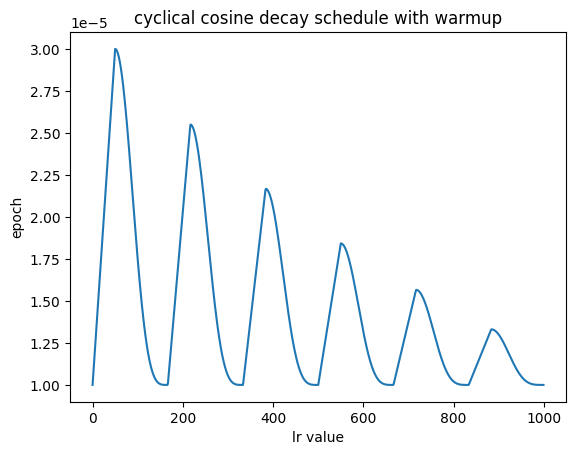

In [8]:
#TODO add cycle multiplier, end value decreased gradually like gamma, could actually use gamma 

def cosine_annealing(total_steps,
                     init_value=1e-5,
                     warmup_frac=0.3, 
                     peak_value=3e-5, 
                     end_value=1e-5,
                     num_cycles=6,
                     gamma=0.85
                     ):
    decay_steps = total_steps / num_cycles
    schedules = []
    boundaries = []
    boundary=0
    for cycle in range(num_cycles):
        schedule = optax.warmup_cosine_decay_schedule(init_value=init_value,
                                                warmup_steps=decay_steps * warmup_frac, 
                                                peak_value=peak_value, 
                                                decay_steps=decay_steps, 
                                                end_value=end_value,
                                                exponent=2)
        boundary = decay_steps + boundary 
        boundaries.append(boundary)
        peak_value = peak_value * gamma
        # end_value = end_value * gamma
        print(end_value)
        schedules.append(schedule)

    return optax.join_schedules(schedules=schedules, 
                                boundaries=boundaries)


fn = cosine_annealing(1000)
lrs = np.array([fn(i) for i in range(1000)])
plt.plot(lrs)
plt.title('cyclical cosine decay schedule with warmup')
plt.xlabel('lr value')
plt.ylabel('epoch')
# plt.savefig('audio_data_plots/cosine_lr_sched')